In [1]:
import networkit as nk
import networkx as nx 
import matplotlib.pyplot as plt
import numpy as np

In [3]:
graph = nk.graphio.EdgeListReader(",",0).read("./musae_git_edges.csv")
nxgraph = nk.nxadapter.nk2nx(graph)

In [3]:
clf = nk.centrality.LocalClusteringCoefficient(graph)

In [4]:
clf.run()
nkglob = np.mean(clf.scores())

nxglob = nx.cluster.average_clustering(nxgraph)
print(nxglob)
print(nkglob)

0.16753704480107237
0.16753704480107584


(array([4.93872679, 2.07718833, 1.14827586, 0.7928382 , 0.23183024,
        0.21671088, 0.19124668, 0.00928382, 0.02413793, 0.36976127]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

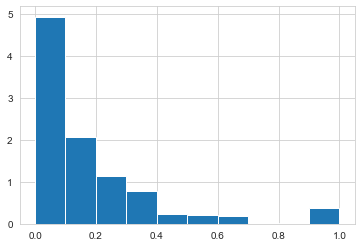

In [7]:
plt.hist(clf.scores(),density=True)

(array([3770., 3770., 3770., 3770., 3770., 3770., 3770., 3770., 3770.,
        3770.]),
 array([    0. ,  3769.9,  7539.8, 11309.7, 15079.6, 18849.5, 22619.4,
        26389.3, 30159.2, 33929.1, 37699. ]),
 <BarContainer object of 10 artists>)

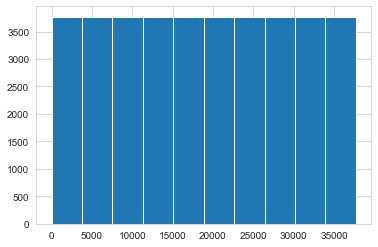

In [10]:
triadic_c = nx.triangles(nxgraph)


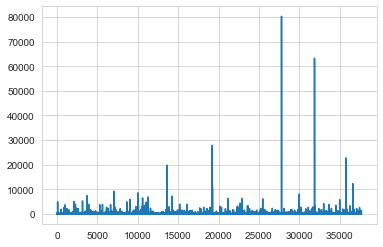

(array([3.7689e+04, 6.0000e+00, 2.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([    0. ,  8028.6, 16057.2, 24085.8, 32114.4, 40143. , 48171.6,
        56200.2, 64228.8, 72257.4, 80286. ]),
 <BarContainer object of 10 artists>)

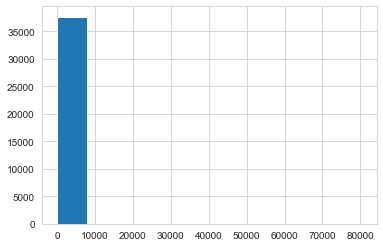

In [15]:
plt.plot(triadic_c.keys(),triadic_c.values())
plt.show()
plt.hist(triadic_c.values())

(array([2.88862e+05, 1.01000e+02, 2.20000e+01, 9.00000e+00, 6.00000e+00,
        1.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([   0. ,  241.1,  482.2,  723.3,  964.4, 1205.5, 1446.6, 1687.7,
        1928.8, 2169.9, 2411. ]),
 <BarContainer object of 10 artists>)

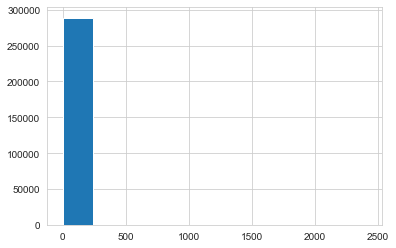

In [12]:
algo = nk.sparsification.TriangleEdgeScore(graph)
graph.indexEdges()
algo.run()
plt.hist(algo.scores())